<a href="https://colab.research.google.com/github/Debora-Ibarra/Repositorio-EDP-1/blob/main/Legendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Legendre


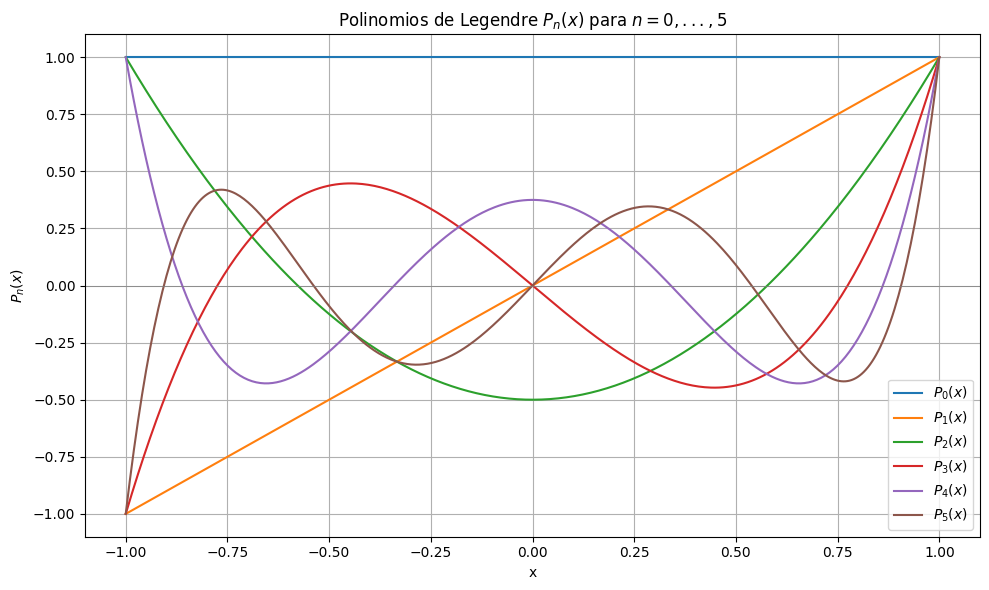

In [40]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, simplify, factorial, lambdify, Eq
from sympy.abc import x
from sympy.functions.special.polynomials import legendre
from scipy.special import legendre as scipy_legendre #Importamos la libreria scipy con la función especial de legendre


x_vals = np.linspace(-1, 1, 400)
plt.figure(figsize=(10, 6))
for n in range(6):
    Pn = scipy_legendre(n) #Polinomio de Legendre
    plt.plot(x_vals, Pn(x_vals), label=f'$P_{{{n}}}(x)$')
plt.title('Polinomios de Legendre $P_n(x)$ para $n = 0, ..., 5$')
plt.xlabel('x')
plt.ylabel('$P_n(x)$') #Graficamos cada uno
plt.axhline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


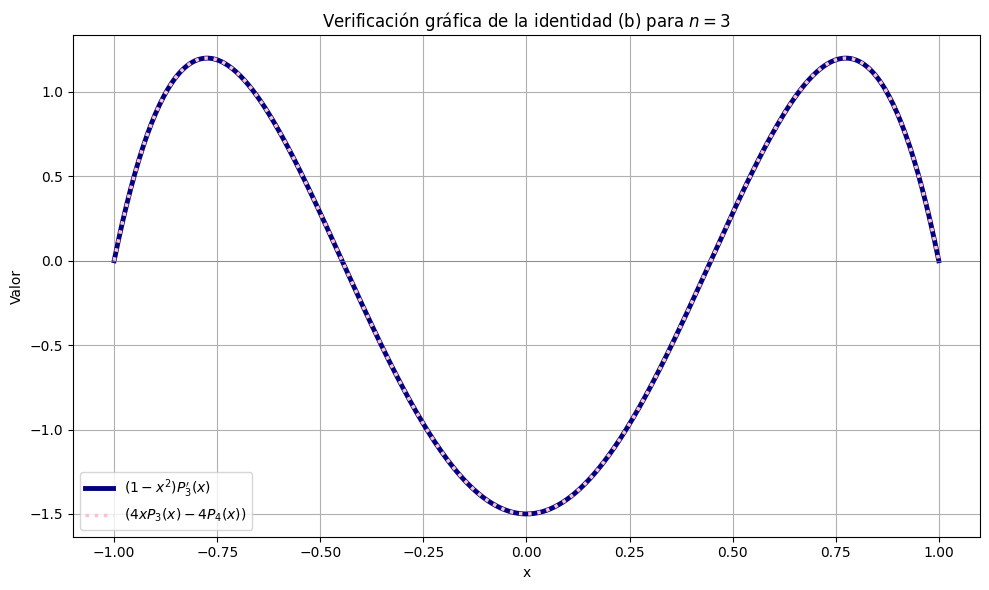

In [41]:
#Comparamos los polinomios de Legendre con la ecuacion
n=3
Pn_expr = legendre(n, x)
Pn1_expr = legendre(n + 1, x)
lhs = (1 - x**2) * diff(Pn_expr, x)
rhs = (n + 1) * x * Pn_expr - (n + 1) * Pn1_expr
lhs_func = lambdify(x, lhs)
rhs_func = lambdify(x, rhs)

xg = np.linspace(-1, 1, 400)
lhs_vals = lhs_func(xg)
rhs_vals = rhs_func(xg)

plt.figure(figsize=(10, 6))
plt.plot(xg, lhs_vals, label='$(1 - x^2)P_3\'(x)$', linestyle='-',color="navy", linewidth=3.5)
plt.plot(xg, rhs_vals, label='$(4xP_3(x) - 4P_4(x))$', linestyle=':', color="pink",linewidth=2.5)
plt.title('Verificación gráfica de la identidad (b) para $n = 3$')
plt.xlabel('x')
plt.ylabel('Valor')
plt.axhline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [42]:
#Si se hace 0 entonces se cumple
left_c = simplify((1 - x**2) * diff(Pn_expr, x))
right_c = simplify((n + 1) * x * Pn_expr - (n + 1) * Pn1_expr)
print("\n Identidad (1 - x^2)P_3'(x) = 4xP_3(x) - 4P_4(x):", Eq(left_c, right_c))


 Identidad (1 - x^2)P_3'(x) = 4xP_3(x) - 4P_4(x): True


In [43]:
#Del mismo modo, si se hace cero se cumple
Pn_1_expr = legendre(n - 1, x)
left_d = simplify((n + 1)*Pn1_expr - (2*n + 1)*x*Pn_expr + n*Pn_1_expr)
print("\n Identidad de recurrencia:", Eq(left_d, 0))


 Identidad de recurrencia: True


In [44]:
#Verificamos la fórmula de Rodrigues, vemos que para n=0 no se cumple, en n=1 se cumple y en n=2,3,4,5 no se cumple
print("\nVerificación de la fórmula de Rodrigues:")
for k in range(6):
    R_expr = (1 / (2*k * factorial(k))) * diff((x**2 - 1)*k, x, k)
    Pk = legendre(k, x)
    correcto = simplify(R_expr - Pk) == 0
    print(f"P_{k}(x) =", R_expr, "==", Pk, "->", correcto)


Verificación de la fórmula de Rodrigues:
P_0(x) = nan == 1 -> False
P_1(x) = x == x -> True
P_2(x) = 1/2 == 3*x**2/2 - 1/2 -> False
P_3(x) = 0 == 5*x**3/2 - 3*x/2 -> False
P_4(x) = 0 == 35*x**4/8 - 15*x**2/4 + 3/8 -> False
P_5(x) = 0 == 63*x**5/8 - 35*x**3/4 + 15*x/8 -> False
